In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
% matplotlib inline

In [2]:
train= pd.read_csv("train.csv")
train.drop("Sl.No", axis=1, inplace=True)
train.head()

,State_Name,Crop_Year,Area(m^2),X1,X2,X3,X4,Yield (kg)
0,Andhra Pradesh,1999,37991,96800.0,75400.0,643.720,881.473,105082.0
1,Andhra Pradesh,2000,39905,105082.0,96800.0,767.351,643.720,117680.0
2,Andhra Pradesh,2001,32878,117680.0,105082.0,579.338,767.351,95609.0
3,Andhra Pradesh,2002,29066,95609.0,117680.0,540.070,579.338,66329.0
4,Andhra Pradesh,2005,25008,85051.0,44891.0,819.700,564.500,69972.0


In [3]:
train.describe()

,Crop_Year,Area(m^2),X1,X2,X3,X4,Yield (kg)
count,1451.000000,1451.000000,1.451000e+03,1.451000e+03,1451.000000,1451.000000,1.451000e+03
mean,2004.122674,69802.623708,1.570952e+05,1.551005e+05,868.281991,881.086910,1.542640e+05
std,3.624834,81898.189344,2.117558e+05,2.114970e+05,495.215091,471.913466,2.126491e+05
min,1999.000000,1.000000,1.000000e+00,2.000000e+00,76.944000,108.800000,0.000000e+00
25%,2001.000000,6494.500000,7.585500e+03,7.225500e+03,595.600000,608.598500,6.326000e+03
50%,2005.000000,40753.000000,7.607200e+04,7.370000e+04,766.499000,778.100000,7.190000e+04
75%,2007.000000,109802.000000,2.340200e+05,2.297000e+05,1024.340500,1055.621000,2.331050e+05
max,2010.000000,545965.000000,1.625000e+06,1.710000e+06,4755.700000,4076.200000,1.637000e+06


In [4]:
train.corr()

,Crop_Year,Area(m^2),X1,X2,X3,X4,Yield (kg)
Crop_Year,1.000000,0.051975,0.045454,0.058948,0.212045,0.127495,0.059166
Area(m^2),0.051975,1.000000,0.827805,0.811963,0.109616,0.082470,0.831301
X1,0.045454,0.827805,1.000000,0.961436,0.002939,-0.021606,0.962284
X2,0.058948,0.811963,0.961436,1.000000,0.019500,-0.019384,0.956239
X3,0.212045,0.109616,0.002939,0.019500,1.000000,0.825796,0.005217
X4,0.127495,0.082470,-0.021606,-0.019384,0.825796,1.000000,-0.034847
Yield (kg),0.059166,0.831301,0.962284,0.956239,0.005217,-0.034847,1.000000


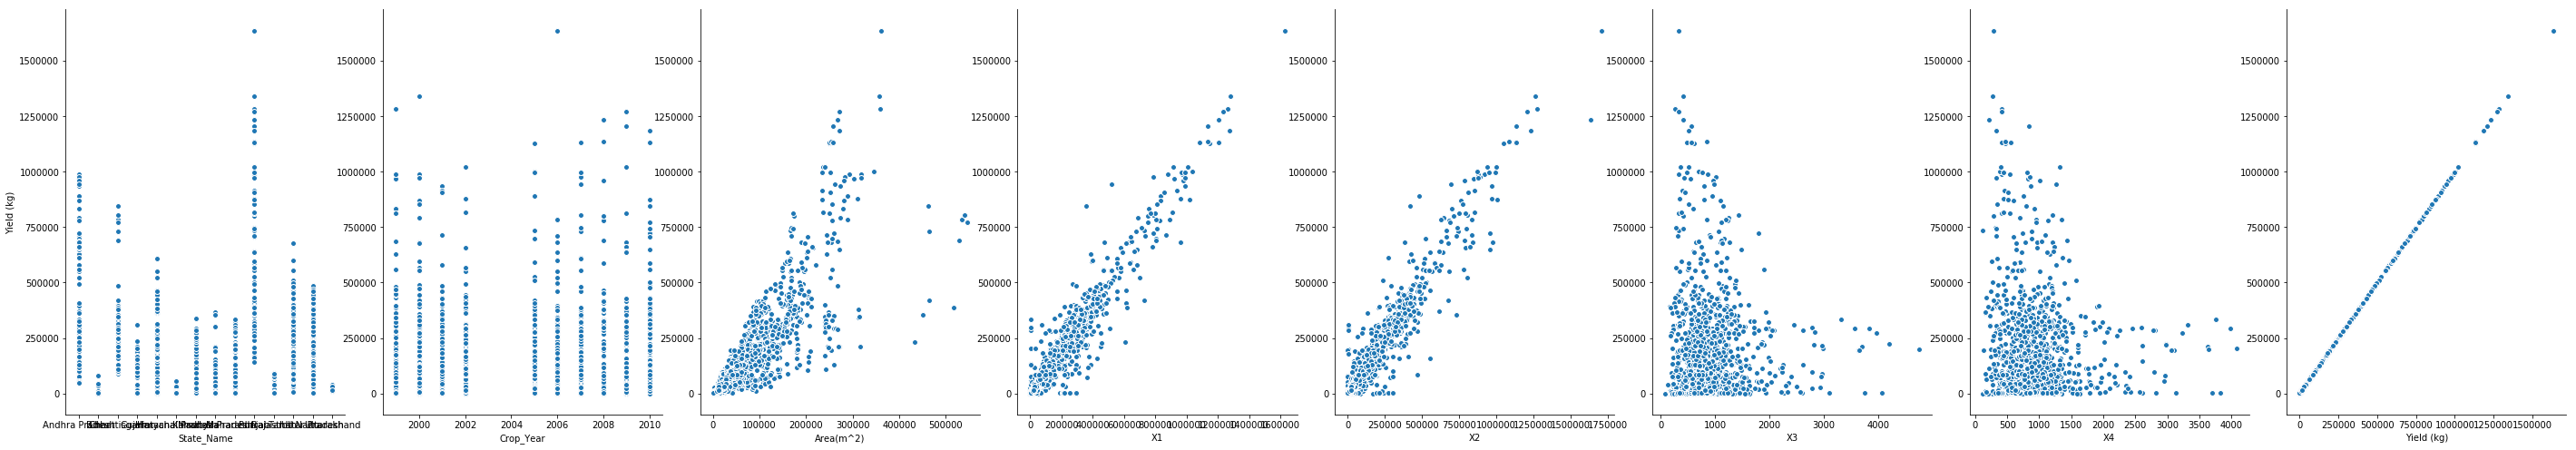

In [5]:
# visualize the relationship between the features and the response using scatterplots

sns.pairplot(train, x_vars= train.columns, y_vars= ['Yield (kg)'], size= 7, aspect= 0.7)

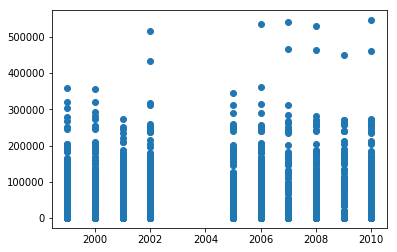

In [6]:
plt.scatter(train['Crop_Year'], train['Area(m^2)'])

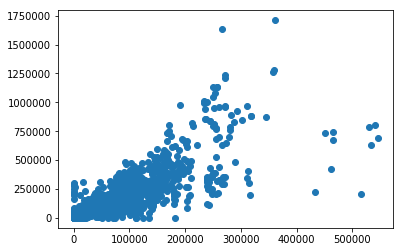

In [7]:
plt.scatter(train['Area(m^2)'], train['X2'])

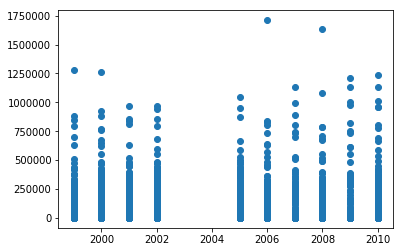

In [8]:
plt.scatter(train['Crop_Year'], train['X2'])

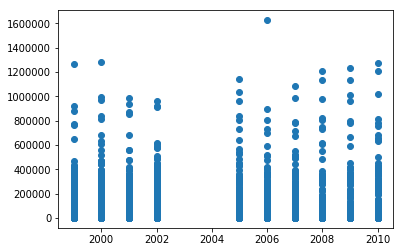

In [9]:
plt.scatter(train['Crop_Year'], train['X1'])

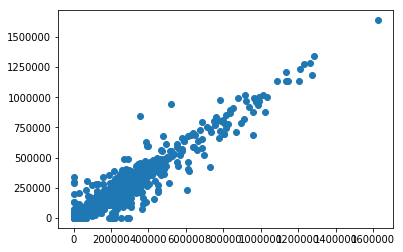

In [10]:
plt.scatter(train['X1'], train['Yield (kg)'])

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, ElasticNet, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.cross_validation import train_test_split
import random
from sklearn.preprocessing import LabelEncoder

C:\Users\Sudhanshu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
train= train[train['X1'] <1400000]
train= train[train['Area(m^2)'] <400000]
train= train[train['X2'] <1250000]

In [13]:
len(train)

1437

In [14]:
le= LabelEncoder()
train['State_Name']= le.fit_transform(train['State_Name'])

In [15]:
X= train.iloc[:,:5]
X= np.array(X)
Y= train['Yield (kg)']
Y= np.array(Y)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 2)
print(len(X_train))

1077


In [17]:
model1= PLSRegression()
y_pred= model1.fit(X_train,Y_train).predict(X_test)
print(np.sqrt(mean_squared_error(y_pred, Y_test)))

48400.8099643


In [18]:
model1= Ridge()
y_pred= model1.fit(X_train,Y_train).predict(X_test)
print(np.sqrt(mean_squared_error(y_pred, Y_test)))

45741.6669823


In [19]:
model1= ElasticNet()
y_pred= model1.fit(X_train,Y_train).predict(X_test)
print(np.sqrt(mean_squared_error(y_pred, Y_test)))

45699.5178549


In [20]:
model1= Lasso()
y_pred= model1.fit(X_train,Y_train).predict(X_test)
print(np.sqrt(mean_squared_error(y_pred, Y_test)))

45741.6826498


In [21]:
feat= X[:, 2].reshape(-1,1)

In [22]:
model1= LinearRegression()
y_pred= model1.fit(X_train,Y_train).predict(X_test)
print(np.sqrt(mean_squared_error(y_pred, Y_test)))
print(np.sqrt(mean_squared_error(model1.fit(X_train, Y_train).predict(X_train), Y_train)))

45741.7497346
49354.45712


In [23]:
model1= ElasticNet()
y_pred1= model1.fit(X_train,Y_train).predict(X_test)
y_pred1= y_pred1[:, np.newaxis]
print(np.sqrt(mean_squared_error(y_pred1, Y_test)))
print(y_pred1.shape)

model2= PLSRegression()
y_pred2= model2.fit(X_train,Y_train).predict(X_test)
print(np.sqrt(mean_squared_error(y_pred2, Y_test)))
print(y_pred2.shape)

model3= LinearRegression()
y_pred3= model3.fit(X_train,Y_train).predict(X_test)
y_pred3= y_pred3[:, np.newaxis]
print(np.sqrt(mean_squared_error(y_pred3, Y_test)))
print(y_pred3.shape)

model4= RandomForestRegressor(n_estimators= 45)
y_pred4= model4.fit(X_train, Y_train).predict(X_test)
y_pred4= y_pred4[:, np.newaxis]
print(np.sqrt(mean_squared_error(y_pred4, Y_test)))

y_avg= (np.array(y_pred1) + np.array(y_pred2)+np.array(y_pred3) +np.array(y_pred4) )/4.0
print(y_avg.shape)
print(np.sqrt(mean_squared_error(y_avg, Y_test)))

45699.5178549
(360, 1)
48400.8099643
(360, 1)
45741.7497346
(360, 1)
37419.8235698
(360, 1)
42401.8952385


In [24]:
model= RandomForestRegressor(n_estimators= 45, random_state=2)
y_pred= model.fit(X_train, Y_train).predict(X_test)
print(np.sqrt(mean_squared_error(y_pred, Y_test)))

38914.3880462


In [25]:
rmse= []
for k in range(1, 50):
    model= RandomForestRegressor(n_estimators= k)
    y_pred= model.fit(X_train, Y_train).predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_pred, Y_test)))

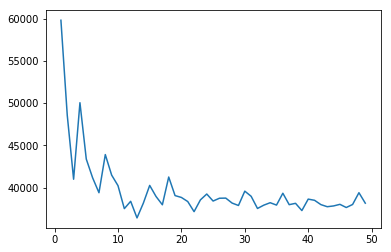

In [26]:
plt.plot(range(1,50), rmse)

In [27]:
rmse.index(min(rmse))

12

## Normalizing the data for better performance of Models

In [28]:
for col in range(2,5):
    max_val= max(X[:, col])
    min_val= min(X[: ,col])
    X[:,col]= min_val + (X[:, col]/ (max_val - min_val))

In [29]:
max_y= max(Y)
min_y= min(Y)
Y= min_y + Y/(max_y-min_y)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 2)
print(len(X_train))

1077


In [31]:
model1= PLSRegression()
y_pred= model1.fit(X_train,Y_train).predict(X_test)
print(np.sqrt(mean_squared_error(y_pred, Y_test)))

0.038021060459


In [32]:
model= RandomForestRegressor(n_estimators= 45, random_state=2)
y_pred= model.fit(X_train, Y_train).predict(X_test)
print(np.sqrt(mean_squared_error(y_pred, Y_test)))

0.0303896319801


In [33]:
model1= Ridge()
y_pred1= model1.fit(X_train,Y_train).predict(X_test)
y_pred1= y_pred1[:, np.newaxis]
print(np.sqrt(mean_squared_error(y_pred1, Y_test)))
print(y_pred1.shape)

model2= PLSRegression()
y_pred2= model2.fit(X_train,Y_train).predict(X_test)
print(np.sqrt(mean_squared_error(y_pred2, Y_test)))
print(y_pred2.shape)

model3= LinearRegression()
y_pred3= model3.fit(X_train,Y_train).predict(X_test)
y_pred3= y_pred3[:, np.newaxis]
print(np.sqrt(mean_squared_error(y_pred3, Y_test)))
print(y_pred3.shape)

model4= RandomForestRegressor(n_estimators= 45)
y_pred4= model.fit(X_train, Y_train).predict(X_test)
y_pred4= y_pred4[:, np.newaxis]
print(np.sqrt(mean_squared_error(y_pred4, Y_test)))

y_avg= (np.array(y_pred1) + np.array(y_pred2)+np.array(y_pred3) +np.array(y_pred4) )/4.0
print(y_avg.shape)
print(np.sqrt(mean_squared_error(y_avg, Y_test)))

0.0359647615556
(360, 1)
0.038021060459
(360, 1)
0.035932246453
(360, 1)
0.0303896319801
(360, 1)
0.0333822504043


In [34]:
0.0303896319801*(max_y- min_y) # almost same rmse after normalization

38686.001510667302

## Predicting the values with Random Forest regressor

In [35]:
test= pd.read_csv("test.csv")
test.drop(["Sl.No", "Yield(Kg)"], axis=1, inplace= True)
test.head()

,State_Name,Crop_Year,Area(m^2),X1,X2,X3,X4
0,Andhra Pradesh,2009,32226,94615.0,95000.0,585.300,867.100
1,Andhra Pradesh,2010,34973,101512.0,94615.0,853.800,585.300
2,Andhra Pradesh,2000,33776,75477.0,105400.0,926.468,792.083
3,Andhra Pradesh,2002,202953,935110.0,987363.0,658.954,793.426
4,Andhra Pradesh,2002,243910,714507.0,868787.0,711.715,892.300


In [36]:
test['State_Name']= le.fit_transform(test['State_Name'])
test= test.iloc[:, :5]
test= np.array(test)

In [37]:
X= train.iloc[:,:5]
X= np.array(X)
Y= train['Yield (kg)']
Y= np.array(Y)

In [41]:
model= RandomForestRegressor(n_estimators= 45, random_state=2)
y_pred= model.fit(X, Y).predict(test)
y_pred= y_pred[:, np.newaxis]
print(np.sqrt(mean_squared_error(model.predict(X), Y)))
print(y_pred.shape)

15909.362678
(480, 1)


In [39]:
df= pd.DataFrame(y_pred)
df.to_csv("submit.csv", index= False)